In [1]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [4]:
dataset = pd.read_csv('family_income_expend.csv', delimiter=';')
dataset.head(10)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Number of Family members
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,4607,63636,3457,4776,2880,36200,34056,7200,19370,4
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,8230,41370,3520,12900,5700,29300,9150,1500,0,3
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,2735,14340,70,324,420,425,6450,500,0,6
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,1390,16638,60,6840,660,300,3762,500,15580,3
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,4620,31122,140,6996,2100,0,8472,1000,18887,4
5,152883,CAR,73326,Wage/Salaries,0,29065,25190,15336,8572,2614,...,1930,22782,95,4044,1500,0,5394,600,0,4
6,198621,CAR,104644,Wage/Salaries,0,40992,36312,12968,12310,2565,...,7930,24126,340,12696,1848,0,6126,6400,72290,5
7,134961,CAR,95644,Other sources of Income,1,37168,28156,14640,15896,3365,...,4085,40776,75,4140,3000,50,5562,1500,51840,5
8,171152,CAR,67348,Other sources of Income,0,23117,15845,11464,6685,1370,...,2780,8370,200,7200,1800,8000,6510,500,0,2
9,625753,CAR,158721,Enterpreneurial Activities,0,56003,43239,26488,25678,3880,...,7740,65730,1786,5160,7200,13180,15210,4000,0,6


In [5]:
x=dataset.iloc[:, [0,5]].values

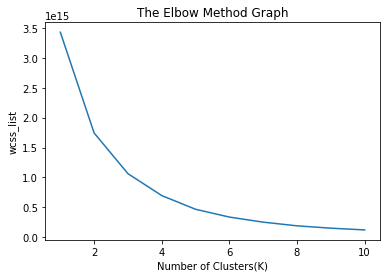

In [6]:
from sklearn.cluster import KMeans
wcss_list =[]

for i in range (1,11) :
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1,11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of Clusters(K)')
mtp.ylabel('wcss_list')
mtp.show()

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(x)

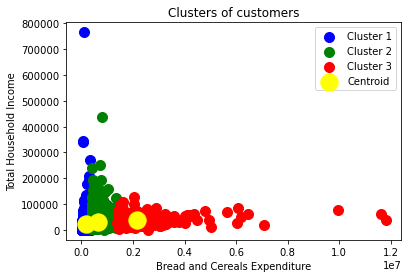

In [8]:
mtp.scatter(x[y_predict == 0,0], x[y_predict == 0,1], s=100, c='blue', label='Cluster 1')
mtp.scatter(x[y_predict == 1,0], x[y_predict == 1,1], s=100, c='green', label='Cluster 2')
mtp.scatter(x[y_predict == 2,0], x[y_predict == 2,1], s=100, c='red', label='Cluster 3')

mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Bread and Cereals Expenditure')
mtp.ylabel('Total Household Income')
mtp.legend()
mtp.show()